In [1]:
from ReadFiles import ReadFiles
from LinearRegressionRecSys import LinearRegressionRecSys
from VisualizeLeads import VisualizeLeads

import pandas as pd
import numpy as np
from zipfile import ZipFile
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [2]:
%%time
database, cluster_labels, portfolio1, portfolio2, portfolio3, original_market_df = ReadFiles().get_data()

Features retrieved from original dataframe: ['de_natureza_juridica', 'sg_uf', 'de_ramo', 'setor', 'idade_emp_cat', 'de_faixa_faturamento_estimado']
Wall time: 35.7 s


In [3]:
recsys = LinearRegressionRecSys(portfolio2, database, cluster_labels)


Testing Portfolio . . .

Database size: 462298
Portfolio size: 566
Portfolios' ids are in the database



In [4]:
recommendations = recsys.train_recommend()


train_recommend -> training . . .

- Veryfing Cluster 0 -

Cluster size: 97296
Clients in cluster: 0
Clients per cluster ratio: 0.0 % 

Processing:

Cluster has no clients, saving {'client_flag': 1} in the output dictionary.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Veryfing Cluster 1 -

Cluster size: 201620
Clients in cluster: 478
Clients per cluster ratio: 0.237 % 

Processing:

Applying train test split . . .
Applying SMOTE oversampling . . .
Training Logistic Regression . . .
Making predictions and saving metrics . . .
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Veryfing Cluster 2 -

Cluster size: 163382
Clients in cluster: 88
Clients per cluster ratio: 0.054 % 

Processing:

Applying train test split . . .
Applying SMOTE ove

In [8]:
visualizer = VisualizeLeads(recommended_ids=recommendations["id"], original_market_df=original_market_df)

Features retrieved from original dataframe: ['de_natureza_juridica', 'sg_uf', 'de_ramo', 'setor', 'idade_emp_cat', 'de_faixa_faturamento_estimado']


In [9]:
visualizer.create_table()

,id,de_natureza_juridica,sg_uf,de_ramo,setor,idade_emp_cat,de_faixa_faturamento_estimado
Ranking,,,,,,,
1,2ecd9bd8e5e856c8e522bf2d7e4403527aa15cb28823d9...,SOCIEDADE ANONIMA FECHADA,RO,COMERCIO VAREJISTA,COMERCIO,> 20,"DE R$ 10.000.000,01 A R$ 30.000.000,00"
2,5dc97cd7d44221a81f42bbd2fddec395eb8ef30b440a93...,SOCIEDADE EMPRESARIA LIMITADA,MA,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,> 20,"DE R$ 30.000.000,01 A R$ 100.000.000,00"
3,d62fed1a30012b02509cc4f3193ec847f935107fe333fe...,SOCIEDADE DE ECONOMIA MISTA,RN,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,> 20,"DE R$ 30.000.000,01 A R$ 100.000.000,00"
4,1726c8acf891c79a5b1c7e49b08509ed507789d2bd81eb...,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,MA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,> 20,"DE R$ 10.000.000,01 A R$ 30.000.000,00"
5,0a7b28fc55ad61995cd006ca213a33f648c91189dbf4b4...,MUNICIPIO,AM,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,> 20,"DE R$ 10.000.000,01 A R$ 30.000.000,00"
6,4fa4676623d1ee3f10024daece0680ebc41ec1fd131847...,MUNICIPIO,RN,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,> 20,"DE R$ 10.000.000,01 A R$ 30.000.000,00"
7,e9dfd1badf5bb309bf100ec6ab64fbadf50aa5b819f70e...,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,PI,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,10 a 15,"DE R$ 10.000.000,01 A R$ 30.000.000,00"
8,874edc3770468e023f58150b7013d43b616653487d5e1f...,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,AC,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,10 a 15,"DE R$ 10.000.000,01 A R$ 30.000.000,00"
9,97ebe3da3897738d4d0d0d52951464c328ee830a4801b2...,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,AC,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,10 a 15,"DE R$ 10.000.000,01 A R$ 30.000.000,00"


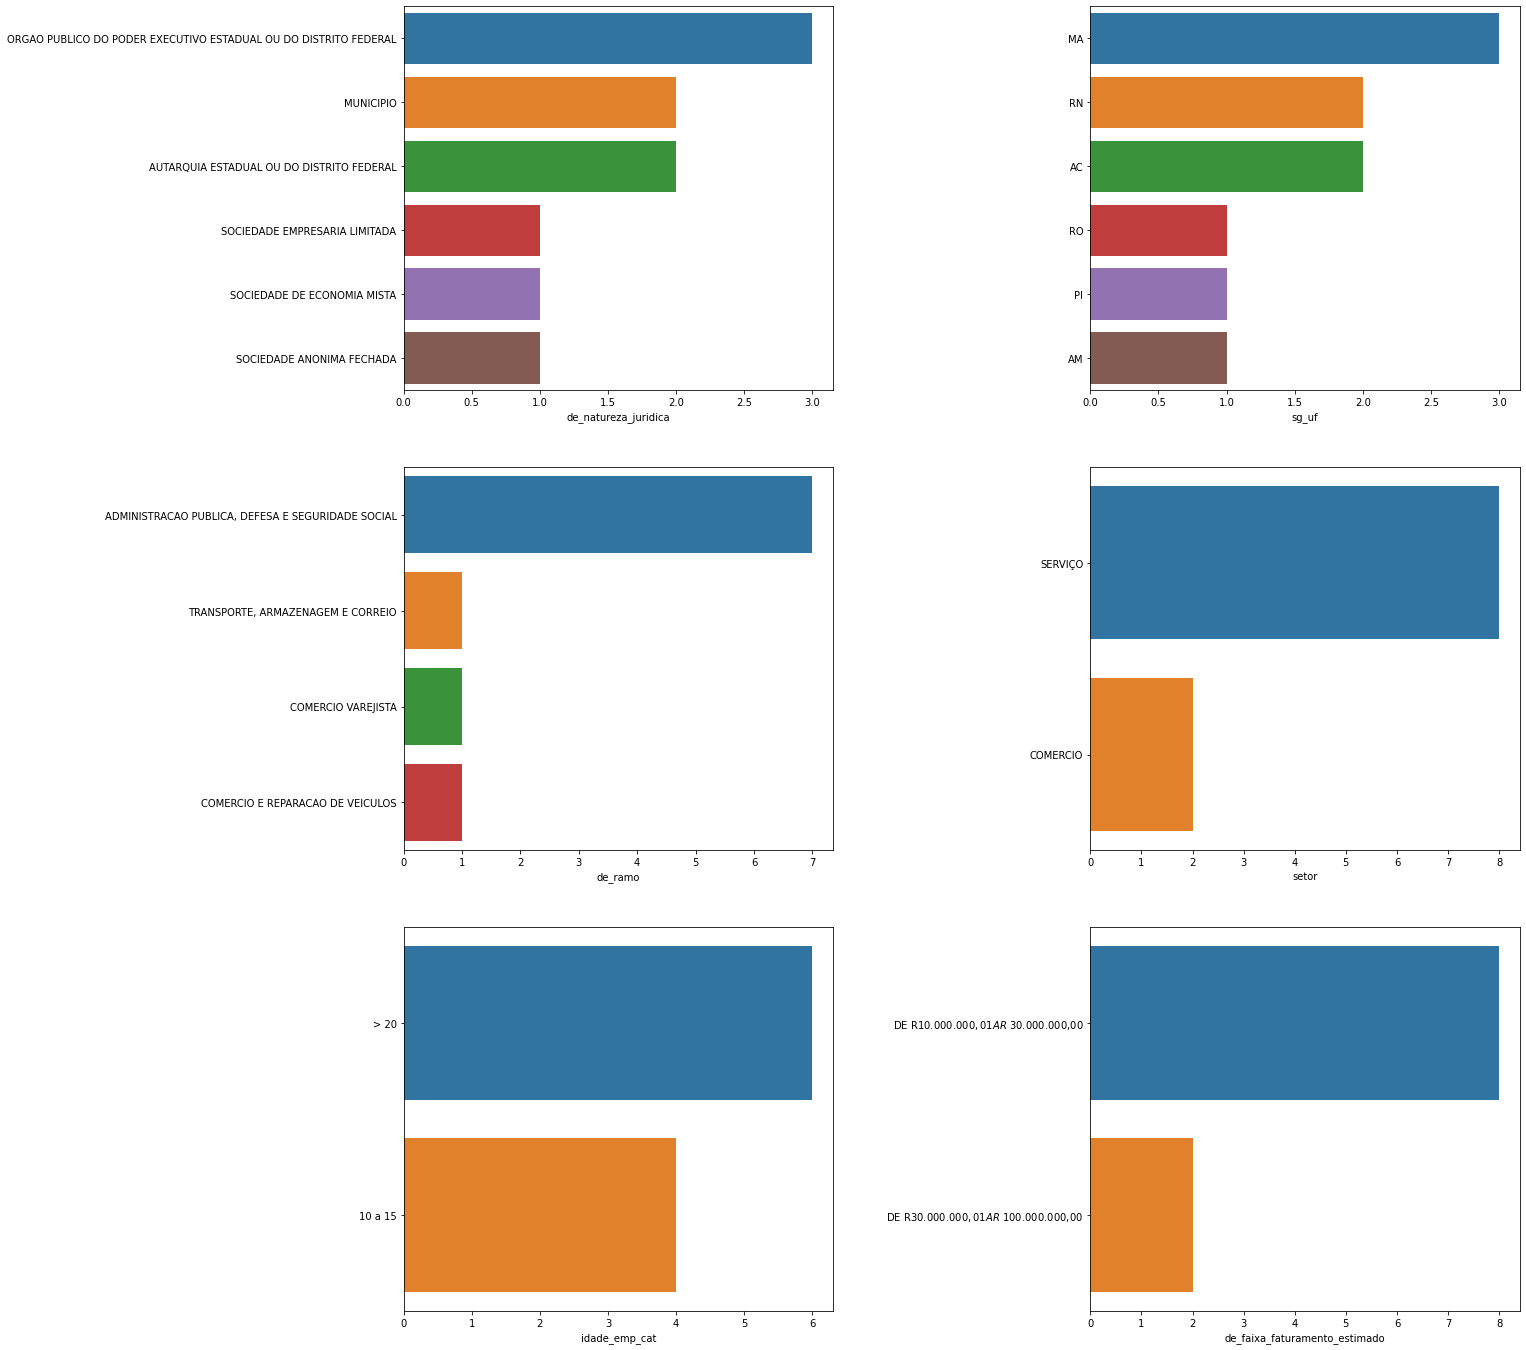

In [11]:
visualizer.create_barplots(n_labels=10)